# DATASET 2 - Repetição no ponto central

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

## Entrada de dados

In [26]:
df = pd.DataFrame({
    "Ensaio": ["Ensaio 1", "Ensaio 2", "Ensaio 3", "Ensaio 4", "Ensaio 5", "Ensaio 6", "Ensaio 7"],
    "Ordem de coleta": [1, 2, 3, 4, 5, 6, 7],
    "Concentração": [1, 3, 5, 5, 5, 7, 9],
    "Sinal": [0.098, 0.135, 0.249, 0.229, 0.209, 0.285, 0.356]    
})
dataset_name = "Dataset 2"
alfa = 0.05

### Plotando o gráfico com os dados

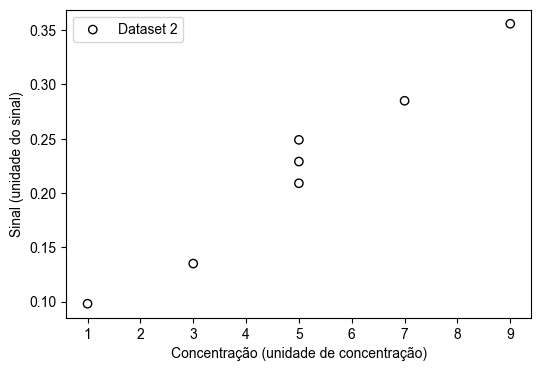

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(df['Concentração'], df['Sinal'], label=dataset_name, edgecolors='k', facecolor='None')
plt.xlabel("Concentração (unidade de concentração)")
plt.ylabel("Sinal (unidade do sinal)")
plt.legend()
plt.show()

## Regressão linear com SciPy

$$ Sinal = b_0 + b_1 \times Concentracao $$

In [4]:
reg_linear = stats.linregress(df["Concentração"], df["Sinal"])
b1 = reg_linear[0]
b1

0.033299999999999996

In [5]:
b0 = reg_linear[1]
b0

0.05650000000000002

## Predição valores pontuais

In [6]:
df["ypred"] = b1*df['Concentração'] + b0
df = df.sort_values(by=["Concentração"])

## Plotando o gráfico de regressão

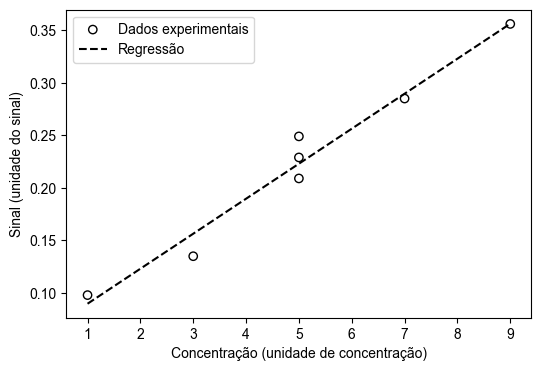

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(df['Concentração'], df['Sinal'], label=dataset_name, edgecolors='k', facecolor='None')
plt.plot(df['Concentração'], df['ypred'], label="Regressão", c='k', ls='--')
plt.xlabel("Concentração (unidade de concentração)")
plt.ylabel("Sinal (unidade do sinal)")
plt.legend()
plt.show()

## ANOVA

#### Somatório dos quadrados TOTAIS

In [8]:
df['sqt'] = np.square(df["Sinal"] - df["Sinal"].mean())
df

,Ensaio,Ordem de coleta,Concentração,Sinal,ypred,sqt
0,Ensaio 1,1,1,0.098,0.0898,0.015625
1,Ensaio 2,2,3,0.135,0.1564,0.007744
2,Ensaio 3,3,5,0.249,0.2230,0.000676
3,Ensaio 4,4,5,0.229,0.2230,0.000036
4,Ensaio 5,5,5,0.209,0.2230,0.000196
5,Ensaio 6,6,7,0.285,0.2896,0.003844
6,Ensaio 7,7,9,0.356,0.3562,0.017689


In [9]:
SQT = df['sqt'].sum()
SQT

0.04580999999999999

In [10]:
gl_total = df.shape[0] - 1
gl_total

6

In [11]:
MSQT = SQT/gl_total
MSQT

0.0076349999999999986

### Somatório dos quadrados da REGRESSÃO

In [12]:
df['sqr'] = np.square(df["ypred"] - df["Sinal"].mean())
df

,Ensaio,Ordem de coleta,Concentração,Sinal,ypred,sqt,sqr
0,Ensaio 1,1,1,0.098,0.0898,0.015625,0.017742
1,Ensaio 2,2,3,0.135,0.1564,0.007744,0.004436
2,Ensaio 3,3,5,0.249,0.2230,0.000676,0.000000
3,Ensaio 4,4,5,0.229,0.2230,0.000036,0.000000
4,Ensaio 5,5,5,0.209,0.2230,0.000196,0.000000
5,Ensaio 6,6,7,0.285,0.2896,0.003844,0.004436
6,Ensaio 7,7,9,0.356,0.3562,0.017689,0.017742


In [13]:
SQR = df['sqr'].sum()
SQR

0.04435559999999998

In [14]:
gl_reg = 1
gl_reg

1

In [15]:
MSQR = SQR/gl_reg
MSQR

0.04435559999999998

### Somatório dos quadrados dos ERROS

In [16]:
df['sqe'] = np.square(df["ypred"] - df["Sinal"])
df

,Ensaio,Ordem de coleta,Concentração,Sinal,ypred,sqt,sqr,sqe
0,Ensaio 1,1,1,0.098,0.0898,0.015625,0.017742,6.724000e-05
1,Ensaio 2,2,3,0.135,0.1564,0.007744,0.004436,4.579600e-04
2,Ensaio 3,3,5,0.249,0.2230,0.000676,0.000000,6.760000e-04
3,Ensaio 4,4,5,0.229,0.2230,0.000036,0.000000,3.600000e-05
4,Ensaio 5,5,5,0.209,0.2230,0.000196,0.000000,1.960000e-04
5,Ensaio 6,6,7,0.285,0.2896,0.003844,0.004436,2.116000e-05
6,Ensaio 7,7,9,0.356,0.3562,0.017689,0.017742,4.000000e-08


In [17]:
SQE = df['sqe'].sum()
SQE

0.0014543999999999998

In [18]:
gl_erro = df.shape[0] - 2
gl_erro

5

In [19]:
MSQE = SQE/gl_erro
MSQE

0.00029088

### Estatística do teste (F_calc)

In [20]:
Fcalc = MSQR/MSQE
Fcalc

152.4876237623762

### Valor crítico (F_critico)

In [21]:
Ftab = stats.f.ppf(1-alfa, gl_reg, gl_erro)
Ftab

6.607890973703367

### p-valor

In [22]:
p_valor = 1- stats.f.cdf(Fcalc, gl_reg, gl_erro)
p_valor

6.168457883748424e-05

### Conclusão do teste

In [23]:
if p_valor < alfa:
    anova_significativo = "Sim"
else:
    anova_significativo = "Não"
anova_significativo  

'Sim'

### Tabela de ANOVA

In [24]:
df_anova = pd.DataFrame({
    "Fonte de Variação": ["Regressão", "Resíduos", "Total"],
    "Somatório": [SQR, SQE, SQT],
    "gl": [gl_reg, gl_erro, gl_total],
    "Médias": [MSQR, MSQE, MSQT],
    "F calculado": [Fcalc, "", ""],
    "F tabelado": [Ftab, "", ""],
    "p-valor": [p_valor, "", ""],
    "Singnificativo?": [anova_significativo, "", ""]
})
df_anova

,Fonte de Variação,Somatório,gl,Médias,F calculado,F tabelado,p-valor,Singnificativo?
0,Regressão,0.044356,1,0.044356,152.487624,6.607891,0.000062,Sim
1,Resíduos,0.001454,5,0.000291,,,,
2,Total,0.045810,6,0.007635,,,,
